In [1]:
import sys
sys.path.append("../utils/")
from runner import Runner
from filter_variants import FilterVariants
from discover_pn import DiscoverPN
import pm4py

In [2]:
exp_name = "Matrix-Chain"
script_path = "../Matrix-Chain-4/variants-linnea/generate-variants-linnea.py"
args = ["100","100","10","100","100"]
runner = Runner("Matrix-Chain", script_path , args)

ret = runner.generate_run_experiments(bRun=True, bGenerate=True)
case_table,_,event_table = runner.get_all_tables(meta=False)
#runner.clean(args)

New solution:................6e+05
No further generation steps possible.
----------------------------------
Number of nodes:                 8
Solution nodes:                  1
Data:                      3.2e+04
Best solution:               6e+05
Intensity:                    18.8
Number of algorithms:            6
Generated Variants.
Running Experiments
Experiments completed


In [3]:
filter_variants = FilterVariants(case_table,event_table)
competing_ct, competing_et = filter_variants.filter_best_flops_duration()
## Clean memory
filter_variants.clear_tables()
#case_table = None
#event_table = None

In [4]:
pn = DiscoverPN(competing_ct, competing_et)

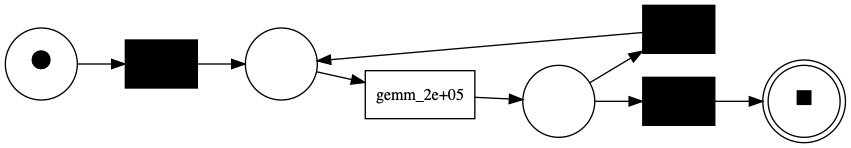

In [5]:
net, im, fm = pn.inductive_miner()
pn.visualize_pn(net, im, fm)

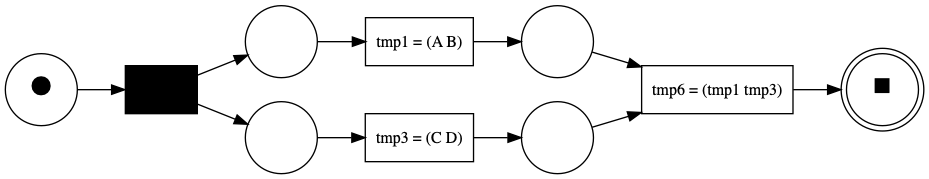

In [6]:
net, im, fm = pn.inductive_miner(activity='concept:operation')
pn.visualize_pn(net, im, fm)

In [7]:
competing_ct

,case:concept:name,case:timestamp:start,case:timestamp:end,case:duration,case:flops,case:num_kernels,case:rel-flops,case:rel-duration
0,algorithm1,1.655129e+09,1.655129e+09,0.000148,600000.0,3,0.0,0.000059
3,algorithm0,1.655129e+09,1.655129e+09,0.000089,600000.0,3,0.0,0.000000


In [8]:
exp_name = "Matrix-Chain"
script_path = "../Matrix-Chain-4/variants-linnea/generate-variants-linnea.py"
args = ["100","100","100","100","100"]

runner = Runner("Matrix-Chain", script_path , args)
ret = runner.generate_run_experiments(bRun=True, bGenerate=True)
case_table,_,event_table = runner.get_all_tables( meta=False)
#runner.clean(args)

New solution:................6e+06
No further generation steps possible.
----------------------------------
Number of nodes:                 8
Solution nodes:                  1
Data:                        5e+04
Best solution:               6e+06
Intensity:                     120
Number of algorithms:            6
Generated Variants.
Running Experiments
Experiments completed


In [9]:
filter_variants = FilterVariants(case_table,event_table)
competing_ct, competing_et = filter_variants.filter_best_flops_duration()
## Clean memory
filter_variants.clear_tables()

In [10]:
pn = DiscoverPN(competing_ct, competing_et)

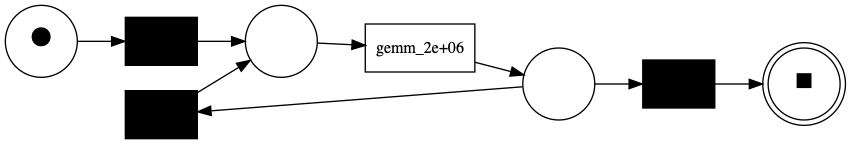

In [11]:
net, im, fm = pn.inductive_miner()
pn.visualize_pn(net, im, fm)

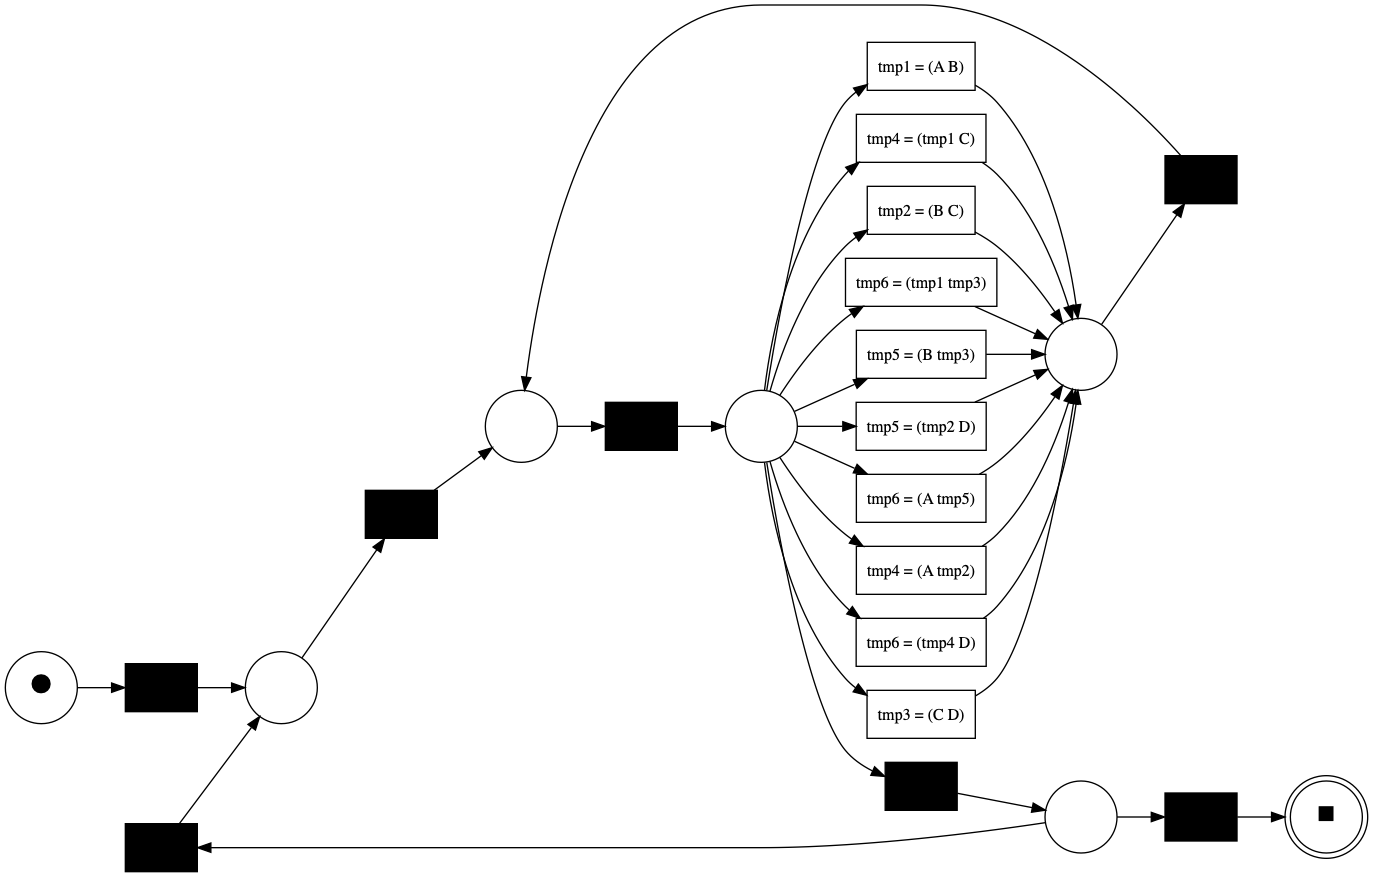

In [12]:
net, im, fm = pn.inductive_miner(activity='concept:operation')
pn.visualize_pn(net, im, fm)

In [13]:
competing_ct

,case:concept:name,case:timestamp:start,case:timestamp:end,case:duration,case:flops,case:num_kernels,case:rel-flops,case:rel-duration
0,algorithm1,1.655129e+09,1.655129e+09,0.000365,6000000.0,3,0.0,0.000099
1,algorithm5,1.655129e+09,1.655129e+09,0.000273,6000000.0,3,0.0,0.000007
2,algorithm4,1.655129e+09,1.655129e+09,0.000278,6000000.0,3,0.0,0.000012
3,algorithm0,1.655129e+09,1.655129e+09,0.000266,6000000.0,3,0.0,0.000000
4,algorithm3,1.655129e+09,1.655129e+09,0.000329,6000000.0,3,0.0,0.000063
5,algorithm2,1.655129e+09,1.655129e+09,0.000284,6000000.0,3,0.0,0.000018


### Filtering

In [16]:
filtered_log = pm4py.filter_log(lambda x: x.attributes['rel-duration'] < 0.00002, pn.event_log)

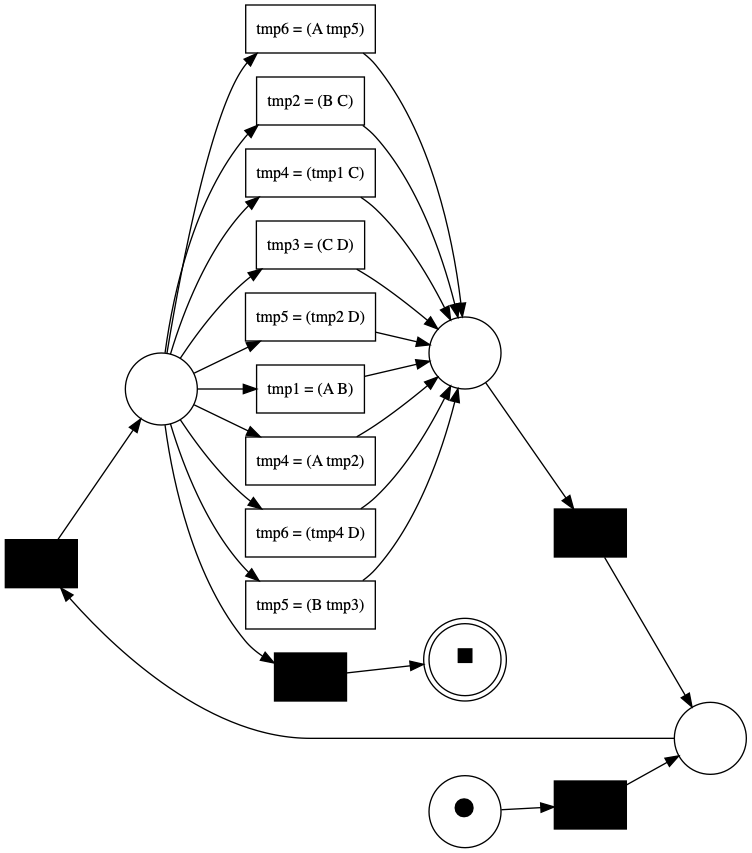

In [17]:
net, im, fm = pn.inductive_miner(activity='concept:operation',filtered_log=filtered_log)
pn.visualize_pn(net, im, fm)

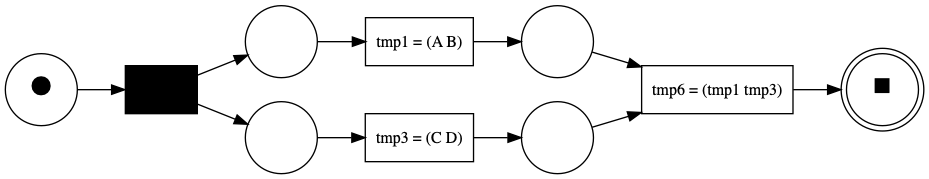

In [19]:
filtered_log = pm4py.filter_log(lambda x: x.attributes['rel-duration'] >= 0.00002, pn.event_log)
net, im, fm = pn.inductive_miner(activity='concept:operation',filtered_log=filtered_log)
pn.visualize_pn(net, im, fm)

### Question:

If I run the experiments again and again, is there a specific variant (among those with equivalent flops) that consistently performs better than the rest

Idea: Run the algorithms and. get performance class (relative perf)

Generate runner to run only algorithms with minimum flops

Discover PN for each. cluster

ml to precidt which among the variants with same flops perform better than the other - just taking kernels or footprint matrix as input as input
